In [42]:
!pip install pandas numpy matplotlib scikit-learn

In [43]:
import pandas as pd
df=pd.read_csv('train_0irEZ2H.csv')

In [44]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [45]:
df[['day','month','year']]=df['week'].str.split('/',expand=True)

In [46]:
df=df.drop('week',axis=1)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X,Y=df.drop('units_sold',axis=1),df['units_sold']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [48]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [49]:
model.score(X_test,Y_test)

0.777354152570318

In [50]:
from sklearn.metrics import root_mean_squared_error
Y_pred=model.predict(X_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
rmse

27.028302106284528

In [51]:
df.units_sold.describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

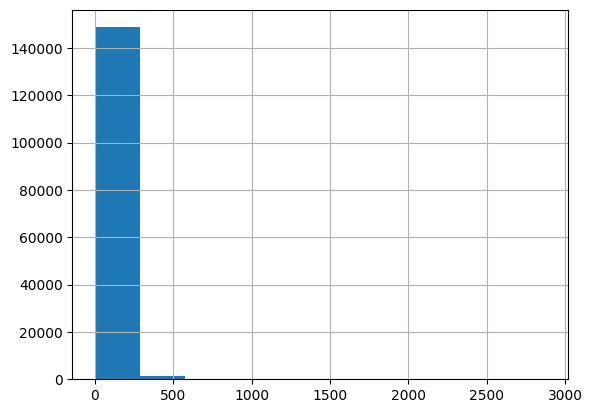

In [52]:
df.units_sold.hist()

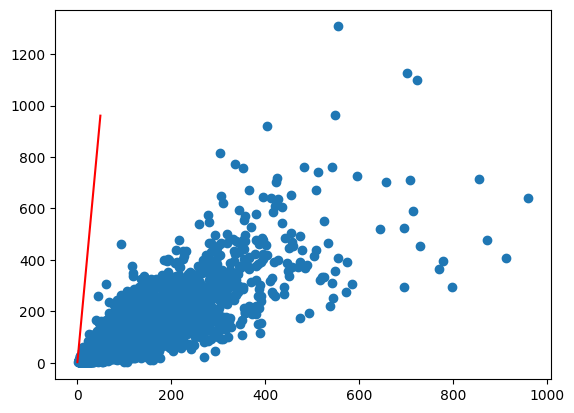

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(Y_pred,Y_test)
plt.plot(np.linspace(Y_pred.min(),Y_pred.max()),color='red')

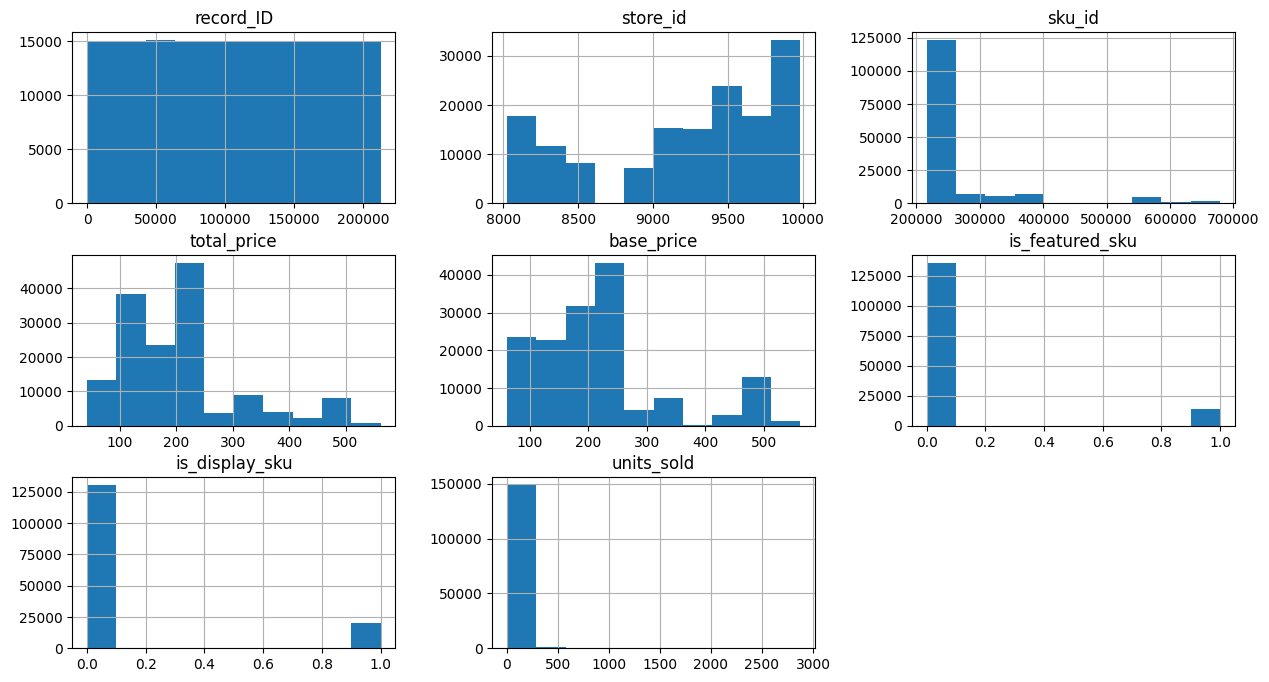

In [54]:
df.hist(figsize=(15,8))
plt.show()

In [55]:
df=df.drop('record_ID',axis=1)
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [56]:
len(df.store_id.unique())

76

In [57]:
len(df.sku_id.unique())

28

In [58]:
df=df[df.units_sold < df.units_sold.quantile(0.99)]

<Axes: >

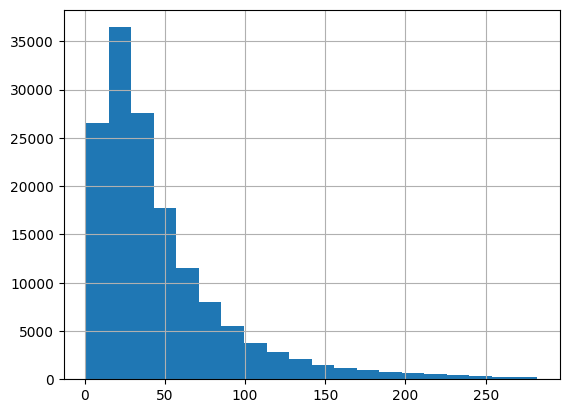

In [59]:
df.units_sold.hist(bins=20)

In [60]:
df=df.join(pd.get_dummies(df.store_id,prefix='store')).drop('store_id',axis=1)
df=df.join(pd.get_dummies(df.sku_id,prefix='item')).drop('sku_id',axis=1)

In [62]:
model=RandomForestRegressor(n_jobs=-1)
X,Y=df.drop('units_sold',axis=1),df['units_sold']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [63]:
model.score(X_test,Y_test)

0.8256297072889882

In [64]:
Y_pred=model.predict(X_test)
rmse=root_mean_squared_error(Y_pred,Y_test)
rmse

17.82480755728898

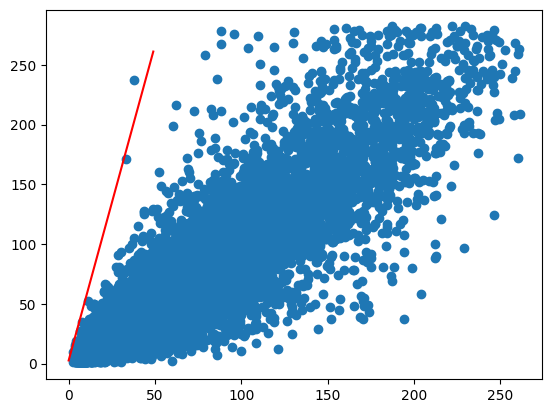

In [65]:
plt.scatter(Y_pred,Y_test)
plt.plot(np.linspace(Y_pred.min(),Y_pred.max()),color='red')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[100,150,200],
    'min_samples_split':[2,3]
}
model=RandomForestRegressor(n_jobs=-1)
grid_search=GridSearchCV(model,param_grid,verbose=2,cv=5)
grid_search.fit(X,Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 3.5min
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 3.5min
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END ..............min_samples_split=2, n_estimators=100; total time= 3.3min


In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
grid_search.best_params_